In [31]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [32]:
begin, end = 6, 61 # (begin is inclusive, end is exclusive)
count_samples = {
    "active": 16,
    "meditate": 15,
    "neutral": 15
}

In [33]:
class Sample:
    def __init__(self):
        self.data = {
            'RawEEG': [],
            'Alpha': [],
            'Low Beta': [],
            'High Beta': [],
            'Gamma': [],
            'Theta': [],
            'Delta': [],
            'Meditation': [],
            'Attention': []
        }

    def recordDataPoint(self, RawEEG, Attention, Meditation, Alpha, Delta, Theta, LowBeta, HighBeta, Gamma):
        self.data['RawEEG'].append(float(RawEEG))
        self.data['Attention'].append(float(Attention))
        self.data['Meditation'].append(float(Meditation))
        self.data['Alpha'].append(float(Alpha))
        self.data['Delta'].append(float(Delta))
        self.data['Theta'].append(float(Theta))
        self.data['Low Beta'].append(float(LowBeta))
        self.data['High Beta'].append(float(HighBeta))
        self.data['Gamma'].append(float(Gamma))

    '''
    Record a line of data from the CSV output, which takes form RawEEG, Alpha, Delta, Gamma, Low Beta, High Beta, Theta, Attention, Meditation

    '''
    def recordDataLine(self, line):
        self.recordDataPoint(line[0], line[7], line[8], line[1], line[2], line[6], line[4], line[5], line[3])
    
    def getEEG(self):
        return self.data['RawEEG']
    
    def getAttention(self):
        return self.data["Attention"]
    
    def getMeditation(self):
        return self.data["Meditation"]
    
    def getAlpha(self):
        return self.data["Alpha"]
    
    def getDelta(self):
        return self.data["Delta"]
    
    def getTheta(self):
        return self.data["Theta"]
    
    def getLowBeta(self):
        return self.data["Low Beta"]
    
    def getHighBeta(self):
        return self.data["High Beta"]
    
    def getGamma(self):
        return self.data["Gamma"]

    def get(self, key):
        return self.data[key]


    def getEngagement(self):
        return [(low_beta + high_beta) / (alpha + theta) for low_beta, high_beta, alpha, theta in zip(self.data["Low Beta"], self.data["High Beta"], self.data["Alpha"], self.data["Theta"])]
   

In [34]:
data = []
dataLabels = []

def transcribeFileToSample(sampleN: int, state: str):
    sample_data = Sample()

    with open("raw_data/" + state + str(sampleN) + ".csv") as f:
        reader = csv.reader(f)

        header = next(reader)
        
        for row in reader:
            sample_data.recordDataLine(row)

        for key in sample_data.data:
            sample_data.data[key] = sample_data.data[key][begin:end]

        data.append(sample_data)
        dataLabels.append(state)

for state in count_samples:
    for i in range(count_samples[state]):
        transcribeFileToSample(i + 1, state)

In [35]:
def plotCorrelation(feature1: list, feature2: list):
    plt.scatter(feature1, feature2)
    plt.show()
    plt.clf()

    return pearsonr(feature1, feature2)

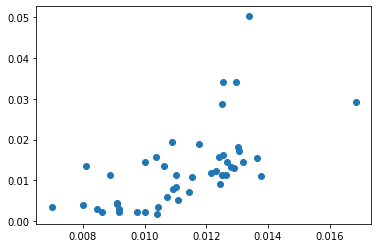

(0.6197152746692728, 4.380761277417671e-06)

<Figure size 432x288 with 0 Axes>

In [36]:
str1 = "Alpha"
str2 = "Delta"

func1 = np.mean
func2 = np.std

feature_1 = [func1(point.get(str1)) for point in data]
feature_2 = [func2(point.get(str2)) for point in data]

plotCorrelation(feature_1, feature_2)

In [37]:
possible_features = ['RawEEG', 'Alpha', 'Delta', 'Theta', 'Low Beta', 'High Beta', 'Gamma']
funcs = {
    "mean": np.mean,
    "standard deviation": np.std
}

for f_1 in possible_features:
    for f_2 in possible_features:
        for func1 in funcs:
            for func2 in funcs:
                feature_1 = [funcs[func1](point.get(f_1)) for point in data]
                feature_2 = [funcs[func2](point.get(f_2)) for point in data]

                print("Correlation between", func1, f_1, "and", func2, f_2, "\t", round(pearsonr(feature_1, feature_2)[0] ** 2, 3))

Correlation between mean RawEEG and mean RawEEG 	 1.0
Correlation between mean RawEEG and standard deviation RawEEG 	 0.007
Correlation between standard deviation RawEEG and mean RawEEG 	 0.007
Correlation between standard deviation RawEEG and standard deviation RawEEG 	 1.0
Correlation between mean RawEEG and mean Alpha 	 0.005
Correlation between mean RawEEG and standard deviation Alpha 	 0.002
Correlation between standard deviation RawEEG and mean Alpha 	 0.483
Correlation between standard deviation RawEEG and standard deviation Alpha 	 0.169
Correlation between mean RawEEG and mean Delta 	 0.008
Correlation between mean RawEEG and standard deviation Delta 	 0.065
Correlation between standard deviation RawEEG and mean Delta 	 0.769
Correlation between standard deviation RawEEG and standard deviation Delta 	 0.663
Correlation between mean RawEEG and mean Theta 	 0.029
Correlation between mean RawEEG and standard deviation Theta 	 0.096
Correlation between standard deviation RawEEG an

In [38]:
def generate_table_contents(func_1, func_2):

    table_contents = np.zeros((len(possible_features), len(possible_features)))
    
    for i_feature_1 in range(len(possible_features)):
        for i_feature_2 in range(len(possible_features)):

            feature_1_str = possible_features[i_feature_1]
            feature_2_str = possible_features[i_feature_2]

            feature_1 = [func_1(point.get(feature_1_str)) for point in data]
            feature_2 = [func_2(point.get(feature_2_str)) for point in data]

            table_contents[i_feature_1][i_feature_2] = round(pearsonr(feature_1, feature_2)[0], 3)

    return table_contents

In [39]:
funcs

{'mean': <function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>,
 'standard deviation': <function numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)>}

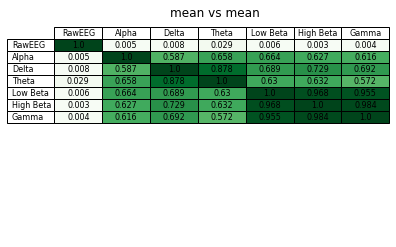

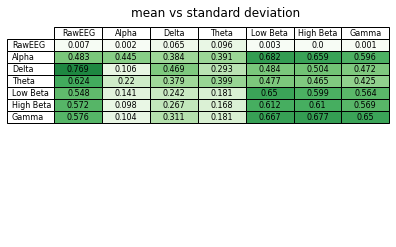

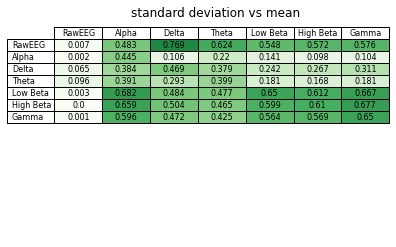

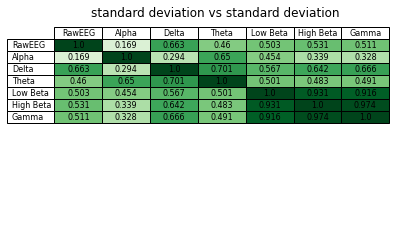

<Figure size 432x288 with 0 Axes>

In [40]:
color_map = cm.get_cmap("Greens")

for func1 in funcs:
    for func2 in funcs:

        table_conts = np.around(np.square(generate_table_contents(funcs[func1], funcs[func2])), decimals = 3) #Convert r to r^2

        # For different ones: func1 of rows vs. func2 of cols
        plt.table(
            cellText = table_conts,
            cellColours = color_map(table_conts),
            rowLabels = possible_features,
            colLabels = possible_features,
            cellLoc = "center",
            loc = "upper left"
        )

        plt.axis("off")

        plt.title(func1 + " vs " + func2)
        plt.show()
        plt.clf()

In [44]:
pearson_r_vals = [round(pearsonr(sample_point.getAttention(), sample_point.getEngagement())[0], 3) for sample_point in data]
print("Mean r:", np.mean(pearson_r_vals))
print("Std of all r vals:", np.std(pearson_r_vals))

pearson_rsquared_vals = [np.around(np.square(pearsonr(sample_point.getAttention(), sample_point.getEngagement())[0]), decimals = 3) for sample_point in data]
print("Mean r squared:", np.mean(pearson_rsquared_vals))
print("Std of all r squared vals:", np.std(pearson_rsquared_vals))

Mean r: 0.012021739130434783
Std of all r vals: 0.32447613224546334
Mean r squared: 0.10545652173913045
Std of all r squared vals: 0.11173079185601105
